# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
file_path = "adult.csv"

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "left")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,NaN,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,NaN,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,NaN,40.0,Cuba,<=50K


In [3]:
data.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [4]:
data.isnull().sum()

age               1628
workclass         3256
fnlwgt             651
education          326
education-num     2605
marital-status     977
occupation        4884
relationship      1302
race               163
sex                 33
capital-gain      1954
capital-loss      2279
hours-per-week    2930
native-country    3907
income             651
dtype: int64

In [5]:
# data = data.dropna()

In [6]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
target_variable = "income"
print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)
print("Target Variable: ", target_variable)

Numerical Features:  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Target Variable:  income


# Linear Regression Imputation (numerical features)

In [7]:
clean_numerical_data = data[numerical_features].dropna()
clean_numerical_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
6,49.0,160187.0,5.0,0.0,0.0,16.0
7,52.0,209642.0,9.0,0.0,0.0,45.0
9,42.0,159449.0,13.0,5178.0,0.0,40.0
...,...,...,...,...,...,...
32555,22.0,310152.0,10.0,0.0,0.0,40.0
32556,27.0,257302.0,12.0,0.0,0.0,38.0
32557,40.0,154374.0,9.0,0.0,0.0,40.0
32559,22.0,201490.0,9.0,0.0,0.0,20.0


In [8]:
clean_numerical_data.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [13]:
import numpy as np

# Function to standardize data
def standardize_data(df):
    means = df.mean()
    stds = df.std()
    return (df - means) / stds  

# Apply Standardization
clean_numerical_data = standardize_data(clean_numerical_data)

# Hyperparameters
learning_rate = 0.001  # Reduce learning rate
epochs = 2500  # Number of training iterations

models = {}
loss_histories = {}  # Dictionary to store loss history for each target

for target in clean_numerical_data.columns:
    X = clean_numerical_data.drop(columns=[target]).values
    y = clean_numerical_data[target].values.reshape(-1, 1)

    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b is X with bias column

    theta = np.random.randn(X_b.shape[1], 1) * 0.01  # Small random initialization

    m = len(y)
    loss_history = []  # Store loss for each epoch

    for epoch in range(epochs):
        predictions = X_b @ theta  # Compute predictions
        error = predictions - y  # Compute error
        loss = (1/(2*m)) * np.sum(error ** 2)  # Compute Mean Squared Error (MSE)
        loss_history.append(loss)  # Store loss

        gradients = (1/m) * X_b.T @ error  # Compute gradients
        theta -= learning_rate * gradients  # Gradient Descent Update

    models[target] = theta.flatten()
    loss_histories[target] = loss_history  # Save loss history

    print(f"Model for predicting {target}:")
    print(f"Weights: {theta.flatten()}\n")
    print(f"Final Loss: {loss:.6f}\n")


Model for predicting age:
Weights: [ 7.28383069e-05 -7.12321568e-02  1.78415332e-02  6.58258272e-02
  5.18146338e-02  5.20888670e-02]

Final Loss: 0.490220

Model for predicting fnlwgt:
Weights: [ 0.00142766 -0.07316197 -0.03884251  0.00894037 -0.00635977 -0.00937939]

Final Loss: 0.495566

Model for predicting education-num:
Weights: [ 0.0015463   0.01850278 -0.03880151  0.10120111  0.07237997  0.12702533]

Final Loss: 0.478879

Model for predicting capital-gain:
Weights: [ 0.00043084  0.06379748  0.00852997  0.10176643 -0.04026712  0.0643553 ]

Final Loss: 0.487236

Model for predicting capital-loss:
Weights: [ 0.0005931   0.05531451 -0.00586503  0.07039155 -0.04307551  0.04689239]

Final Loss: 0.492750

Model for predicting hours-per-week:
Weights: [-0.00074034  0.04888737 -0.00852023  0.12695219  0.06447425  0.04627174]

Final Loss: 0.483688



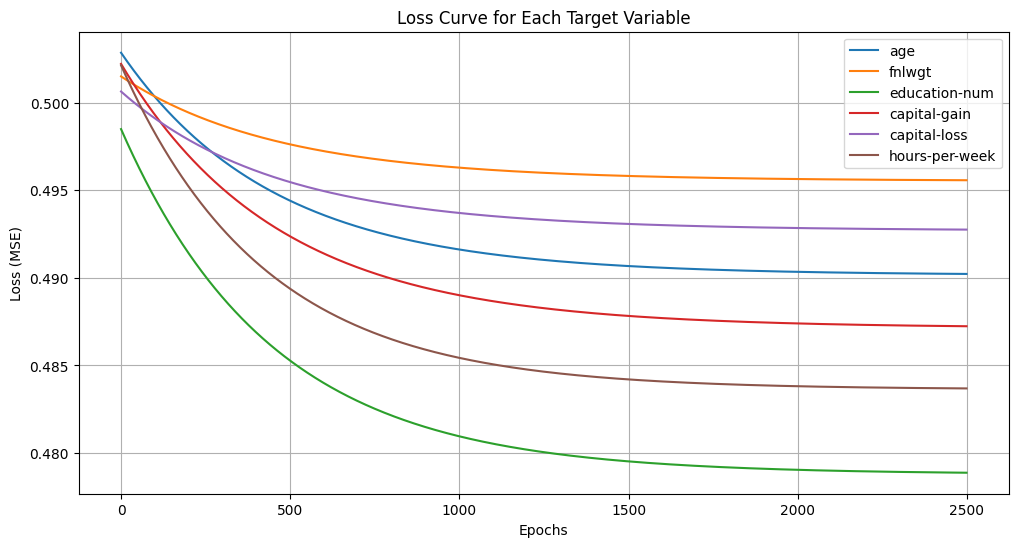

In [14]:
import matplotlib.pyplot as plt

# Plot loss history for each target variable
plt.figure(figsize=(12, 6))

for target, loss_history in loss_histories.items():
    plt.plot(loss_history, label=target)

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Each Target Variable")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

#data[target_variable] = pd.factorize(data[target_variable])[0]  
# 0 -->  <=50K
# 1 -->  >50K

# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=data["age"], y=data[target_variable], alpha=0.6)
# sns.regplot(x=data["age"], y=data[target_variable], scatter=False, color='red')  # Regression line
# plt.title("Relationship Between Age and Income")
# plt.xlabel("Age")
# plt.ylabel("Income (Encoded)")
# plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(16, 4))
    sns.countplot(x=data[feature], hue=data[feature], palette="viridis", legend=False)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()